In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Get base vectors using 3d FFT

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


<AxesSubplot:xlabel='x', ylabel='y'>

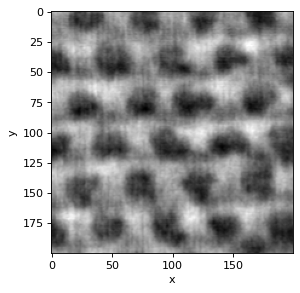

In [1]:
from nanomesh import Volume, Plane
vol = Volume.load('sample_data.npy')
plane = vol.select_plane(x=161)#.gaussian(5)
plane.show()

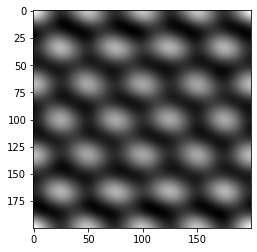

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def abs2(x):
    return x.real**2 + x.imag**2

fft = np.fft.fft2(plane.image, norm="ortho")
ifft = np.fft.ifft2(abs2(fft), norm="ortho")

plt.figure()
plt.imshow(abs(ifft))
plt.show()

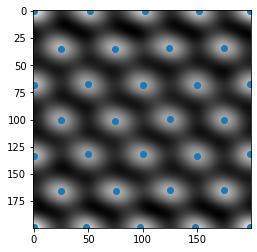

In [6]:
from skimage import feature

peaks = feature.blob_dog(abs(ifft), min_sigma=10, max_sigma=20, overlap=1, threshold=5)
peaks = peaks[:,0:2]
x,y = peaks.T

plt.figure()
plt.imshow(abs(ifft))
plt.scatter(y, x)
plt.show()

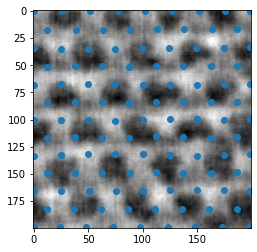

In [7]:
from scipy.spatial import Delaunay
d = Delaunay(peaks)

from nanomesh.mesh_container import TriangleMesh

triangles = TriangleMesh.from_scipy(d)
triangles = triangles.subdivide()

plt.figure()
# plt.imshow(abs(ifft))
plt.imshow(plane.image)
# plt.triplot(triangles.vertices[:,1], triangles.vertices[:,0], triangles.faces)
plt.plot(triangles.vertices[:,1], triangles.vertices[:,0], 'o')
plt.show()

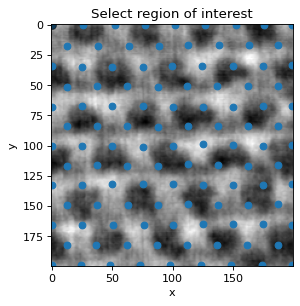

In [8]:
roi = plane.select_roi(from_points=triangles.vertices)